In [2]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *

In [3]:
dim = 50 # Define the dimension

In [4]:
# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(dim) 
identity_matrix = np.eye(dim) 
cov_matrix = identity_matrix 
num_samples = 62 

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [8]:
n = 10 # Number of iterations
MLL = np.zeros(n) # Define the MLL
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        points[i] += 0.1*Gradient_function_fast(i,dim,Y,points,2) # Use Gradient_function and take step=0.1*grad
    MLL[k] = Loss_function_fast(points,Y,2) # Calcualte the probability using Loss_function

Text(0.5, 0, 'Iterration')

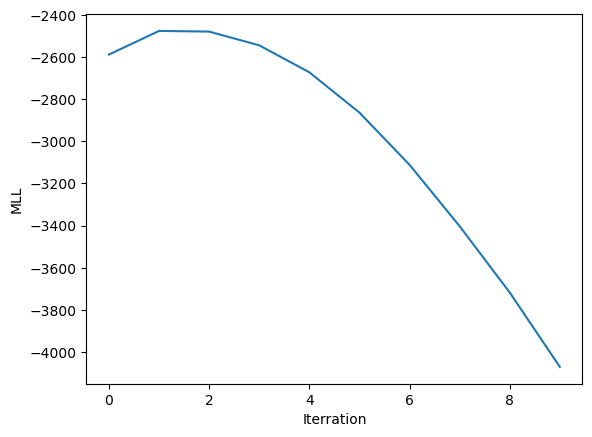

In [9]:
plt.plot(MLL)
plt.ylabel('MLL')
plt.xlabel('Iterration')

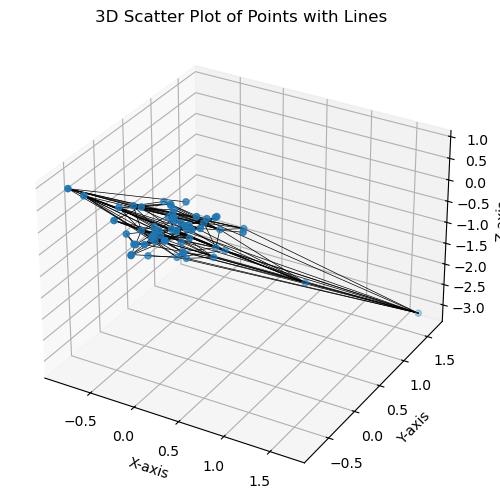

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for m in range(len(Y)):
    if Y[m][0] == 1:
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], color='black', linewidth=0.5)

# Scatter plot of points in 3D
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
z = [point[2] for point in points.values()]
ax.scatter(x, y, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot of Points with Lines')
ax.grid(True)

plt.show()


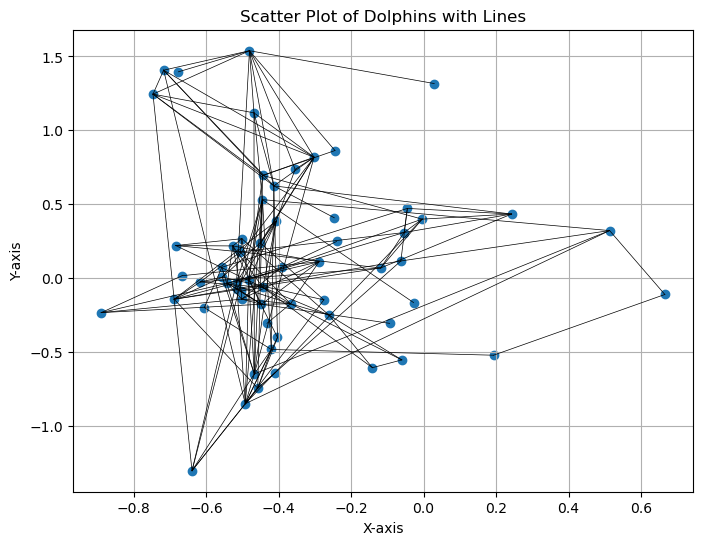

In [11]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dolphins with Lines')
plt.grid(True)
plt.show()